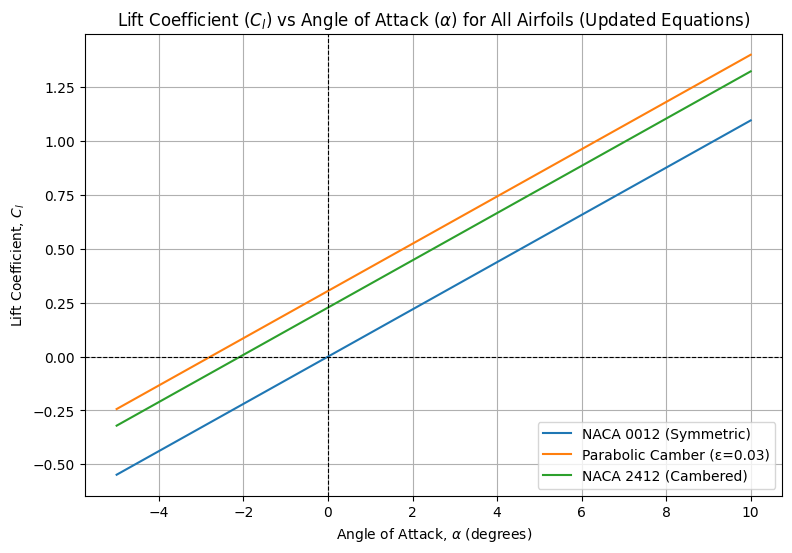

In [2]:
# Mastering Airfoil Design (i)
import numpy as np
import matplotlib.pyplot as plt

alpha_deg = np.linspace(-5, 10, 100)
alpha_rad = np.deg2rad(alpha_deg)

Cl_0012 = 2 * np.pi * alpha_rad

Cl_parab = 2 * np.pi * (alpha_rad + 0.04853)

Cl_2412 = 2 * np.pi * (alpha_rad + 0.036255)

plt.figure(figsize=(9, 6))
plt.plot(alpha_deg, Cl_0012, label="NACA 0012 (Symmetric)")
plt.plot(alpha_deg, Cl_parab, label="Parabolic Camber (ε=0.03)")
plt.plot(alpha_deg, Cl_2412, label="NACA 2412 (Cambered)")
plt.xlabel("Angle of Attack, $\\alpha$ (degrees)")
plt.ylabel("Lift Coefficient, $C_l$")
plt.title("Lift Coefficient ($C_l$) vs Angle of Attack ($\\alpha$) for All Airfoils (Updated Equations)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid()
plt.legend()
plt.show()


In [3]:
# Mastering Airfoil Design Bonus (iii)
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def diff(x):
    return x[1:] - x[:-1]

coords = np.loadtxt("NACA_2412.csv", delimiter=",", dtype=np.float32)
coords[:,0] /= 1000.0
coords[:,1] /= 1000.0
x = coords[:,0]
y = coords[:,1]

plt.figure()
plt.scatter(x,y)
plt.ylim([-0.5,0.5])
plt.title('NACA 2412 Airfoil Geometry')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

num_points = coords.shape[0]
x_upper = np.flip(x[:num_points//2+1])
y_upper = np.flip(y[:num_points//2+1])
x_lower = x[num_points//2:]
y_lower = y[num_points//2:]

num_panels = 300
num_panels_upper = num_panels//2
num_panels_lower = num_panels - num_panels_upper

if len(x_upper)-1 < num_panels_upper or len(x_lower)-1 < num_panels_lower:
    pass

x_upper = x_upper[:num_panels_upper+1]
y_upper = y_upper[:num_panels_upper+1]
x_lower = x_lower[:num_panels_lower+1]
y_lower = y_lower[:num_panels_lower+1]

def panel_points(xarr, yarr):
    xv = 0.75*xarr[:-1] + 0.25*xarr[1:]
    yv = 0.75*yarr[:-1] + 0.25*yarr[1:]
    xc = 0.25*xarr[:-1] + 0.75*xarr[1:]
    yc = 0.25*yarr[:-1] + 0.75*yarr[1:]
    L = np.sqrt((xarr[1:] - xarr[:-1])**2 + (yarr[1:] - yarr[:-1])**2)
    return xv, yv, xc, yc, L

xv_upper, yv_upper, xc_upper, yc_upper, L_upper = panel_points(x_upper, y_upper)
xv_lower, yv_lower, xc_lower, yc_lower, L_lower = panel_points(x_lower, y_lower)

xv = np.concatenate((xv_upper, xv_lower))
yv = np.concatenate((yv_upper, yv_lower))
xc = np.concatenate((xc_upper, xc_lower))
yc = np.concatenate((yc_upper, yc_lower))
L = np.concatenate((L_upper, L_lower))

def panel_angles(xarr, yarr):
    return np.arctan2(yarr[1:] - yarr[:-1], xarr[1:] - xarr[:-1])

theta_upper = panel_angles(x_upper, y_upper)
theta_lower = panel_angles(x_lower, y_lower)
theta_p = np.concatenate((theta_upper, theta_lower))

alpha_vals = np.linspace(0,10,21, dtype=int)
Cl_vals = np.ones(alpha_vals.shape[0])

for i in range(alpha_vals.shape[0]):
    alpha = alpha_vals[i]
    alpha_rad = alpha*np.pi/180.0


    num_pan = len(xc)
    A = np.zeros((num_pan, num_pan))
    B = np.zeros((num_pan,1))

    for p in range(num_pan):
        thetap = theta_p[p]
        for q in range(num_pan):
            dx = xc[p] - xv[q]
            dy = yc[p] - yv[q]
            R = np.sqrt(dx**2 + dy**2)
            nx = -np.sin(thetap)
            ny = np.cos(thetap)
            vx = -(dy)/(2*np.pi*R**2)
            vy = (dx)/(2*np.pi*R**2)

            A[p,q] = vx*nx + vy*ny

        B[p,0] = np.sin(alpha_rad - thetap)

    Gamma = la.solve(A, B)

    Cl = 2*np.sum(Gamma)
    Cl_vals[i] = Cl

plt.figure()
plt.plot(alpha_vals, Cl_vals, label='Vortex Panel Method')

alpha_L0 = -2.077 * np.pi/180
plt.plot(alpha_vals, 2*np.pi*((alpha_vals*np.pi/180)-alpha_L0), label='Analytic TAT')

plt.title('Lift Coefficient as a Function of Angle of Attack')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift Coefficient')
plt.legend()
plt.show()


FileNotFoundError: NACA_2412.csv not found.

In [ ]:

from google.colab import files

uploaded = files.upload()

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Upload files
uploaded = files.upload()

# Function to process XFLR5 files
def process_xflr5_file(file_name):
    data = pd.read_csv(file_name, delim_whitespace=True, skiprows=12, header=None)
    data.columns = [
        "Alpha", "Cl", "Cd", "Cdp", "Cm",
        "Top_Xtr", "Bot_Xtr", "Cpmin", "Chinge", "XCp"
    ]
    return data[["Alpha", "Cl"]]

data_re3e6 = process_xflr5_file("RE3e6.txt")
data_re6e6 = process_xflr5_file("Re6e6.txt")
data_re9e6 = process_xflr5_file("Re9e6.txt")

alpha_deg = np.linspace(-5, 10, 100)
alpha_rad = np.radians(alpha_deg)
Cl_2412 = 2 * np.pi * (alpha_rad + 0.036255)

plt.figure(figsize=(10, 6))
plt.plot(data_re3e6["Alpha"], data_re3e6["Cl"], label="XFLR5 Re=3e6", color="red")
plt.plot(data_re6e6["Alpha"], data_re6e6["Cl"], label="XFLR5 Re=6e6", linestyle="--", color="green")
plt.plot(data_re9e6["Alpha"], data_re9e6["Cl"], label="XFLR5 Re=9e6", linestyle=":", color="purple")
plt.plot(alpha_deg, Cl_2412, label="TAT NACA 2412", linestyle="--", color="blue")
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Lift Coefficient (Cl)")
plt.title("Comparison of TAT and XFLR5 Results for NACA 2412")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


alpha_range = np.linspace(-5, 15, 100)


AR_tapered = 4.58
e_tapered = 0.96
C_L_alpha_2D = 0.11


C_L_alpha_tapered = C_L_alpha_2D / (1 + (C_L_alpha_2D / (np.pi * AR_tapered * e_tapered)))
alpha_geo_tapered = 13.05
C_L_tapered_new = C_L_alpha_tapered * (alpha_range - alpha_geo_tapered + 2)


C_L_alpha_elliptical = 4.372 / (180 / np.pi)
alpha_geo_elliptical = 12.887
C_L_elliptical = C_L_alpha_elliptical * (alpha_range - alpha_geo_elliptical + 2)


AR_rectangular_same = AR_tapered
e_rectangular_same = 0.7
C_L_alpha_rectangular_same = C_L_alpha_2D / (1 + (C_L_alpha_2D / (np.pi * AR_rectangular_same * e_rectangular_same)))
alpha_geo_rectangular = 12.93
C_L_rectangular_new = C_L_alpha_rectangular_same * (alpha_range - alpha_geo_rectangular + 2)


plt.figure(figsize=(10, 6))
plt.plot(alpha_range, C_L_tapered_new, label="Tapered Wing (AR=4.58, α_geo=13.05°)", color="blue")
plt.plot(alpha_range, C_L_rectangular_new, label="Rectangular Wing (AR=4.58, α_geo=12.93°)", color="green")
plt.plot(alpha_range, C_L_elliptical, label="Elliptical Wing (α_geo=12.887°)", color="red")


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Lift Coefficient (C_L) vs Angle of Attack (α) for Different Wing Designs", fontsize=14)
plt.xlabel("Angle of Attack (α) [degrees]", fontsize=12)
plt.ylabel("Lift Coefficient (C_L)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha_data = np.array([-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0])
CL_data = np.array([0.001269, 0.001211, 0.001153, 0.001095, 0.001037, 0.000979, 0.00092, 0.000862, 0.000804, 0.000745, 0.000687, 0.000628, 0.000569, 0.000511, 0.000452, 0.000393, 0.000335, 0.000276, 0.000217, 0.000159, 0.0001, 0.000041, -0.000018, -0.000077, -0.000135, -0.000194, -0.000253, -0.000311, -0.00037, -0.000429, -0.000487, -0.000546, -0.000604, -0.000663, -0.000721, -0.00078, -0.000838, -0.000896, -0.000954, -0.001012, -0.00107]) * -1*1000 + .55

alpha_theory = np.linspace(-8, 12, 100)

alpha_rad = np.deg2rad(alpha_theory)
Cl_2412 = 2 * np.pi * (alpha_rad + 0.036255)

plt.figure(figsize=(10, 6))
plt.plot(alpha_data, CL_data, label="NACA 2412 TAT")
plt.plot(alpha_theory, Cl_2412, label="Tapered Wing Simulation")
plt.xlabel("Angle of Attack (deg)")
plt.ylabel("Lift Coefficient (CL)")
plt.title("Lift Coefficient vs. Angle of Attack")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
